## Formative Assessment (Statistics)

### 1.Basic EDA

In [32]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '\\Users\ASUS\Desktop\Syama\Python\ML Assignment\house_price.csv'
#file_path = 'https://drive.google.com/file/d/1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P/view?usp=sharing'
df = pd.read_csv(file_path,on_bad_lines='skip')

# Q1. Perform Basic EDA
print("Basic Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nUnique Values in 'location':", df['location'].nunique())
print("Unique Values in 'size':", df['size'].unique())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None

Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2

<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16864\2186041516.py:8: SyntaxWarning: invalid escape sequence '\A'
  file_path = '\\Users\ASUS\Desktop\Syama\Python\ML Assignment\house_price.csv'


In [34]:
# Q2. Outlier Detection and Removal

# a) Mean and Standard Deviation Method

mean_price_per_sqft = df['price_per_sqft'].mean()
std_price_per_sqft = df['price_per_sqft'].std()
lower_bound_std = mean_price_per_sqft - 3 * std_price_per_sqft
upper_bound_std = mean_price_per_sqft + 3 * std_price_per_sqft
df_no_outliers_std = df[(df['price_per_sqft'] >= lower_bound_std) & (df['price_per_sqft'] <= upper_bound_std)]

# b) Percentile Method
lower_bound_percentile = df['price_per_sqft'].quantile(0.01)
upper_bound_percentile = df['price_per_sqft'].quantile(0.99)
df_no_outliers_percentile = df[(df['price_per_sqft'] >= lower_bound_percentile) & (df['price_per_sqft'] <= upper_bound_percentile)]

# c) IQR Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
df_no_outliers_iqr = df[(df['price_per_sqft'] >= lower_bound_iqr) & (df['price_per_sqft'] <= upper_bound_iqr)]

# d) Z-Score Method
z_scores = stats.zscore(df['price_per_sqft'])
df_no_outliers_z = df[(z_scores >= -3) & (z_scores <= 3)]

# Display the number of remaining entries after outlier removal
print("\nNumber of entries after outlier removal:")
print("Original:", len(df))
print("Mean & Std Dev Method:", len(df_no_outliers_std))
print("Percentile Method:", len(df_no_outliers_percentile))
print("IQR Method:", len(df_no_outliers_iqr))
print("Z-Score Method:", len(df_no_outliers_z))


Number of entries after outlier removal:
Original: 13200
Mean & Std Dev Method: 13195
Percentile Method: 12941
IQR Method: 11935
Z-Score Method: 13195


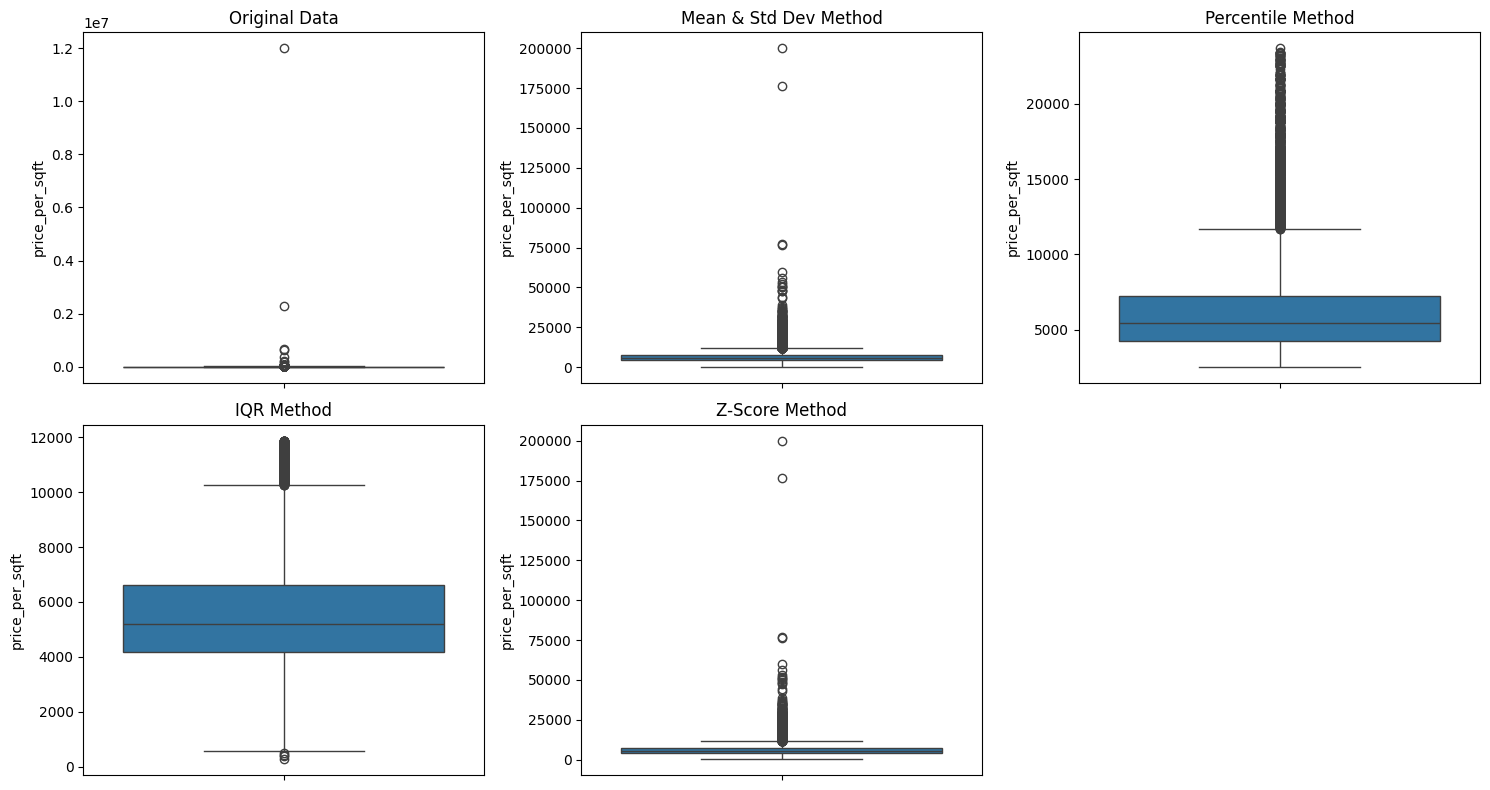

In [35]:
# Q3. Create Box Plot to Determine Best Outlier Removal Method
plt.figure(figsize=(15, 8))

# Plotting the box plots
plt.subplot(2, 3, 1)
sns.boxplot(df['price_per_sqft'])
plt.title('Original Data')

plt.subplot(2, 3, 2)
sns.boxplot(df_no_outliers_std['price_per_sqft'])
plt.title('Mean & Std Dev Method')

plt.subplot(2, 3, 3)
sns.boxplot(df_no_outliers_percentile['price_per_sqft'])
plt.title('Percentile Method')

plt.subplot(2, 3, 4)
sns.boxplot(df_no_outliers_iqr['price_per_sqft'])
plt.title('IQR Method')

plt.subplot(2, 3, 5)
sns.boxplot(df_no_outliers_z['price_per_sqft'])
plt.title('Z-Score Method')

plt.tight_layout()
plt.show()

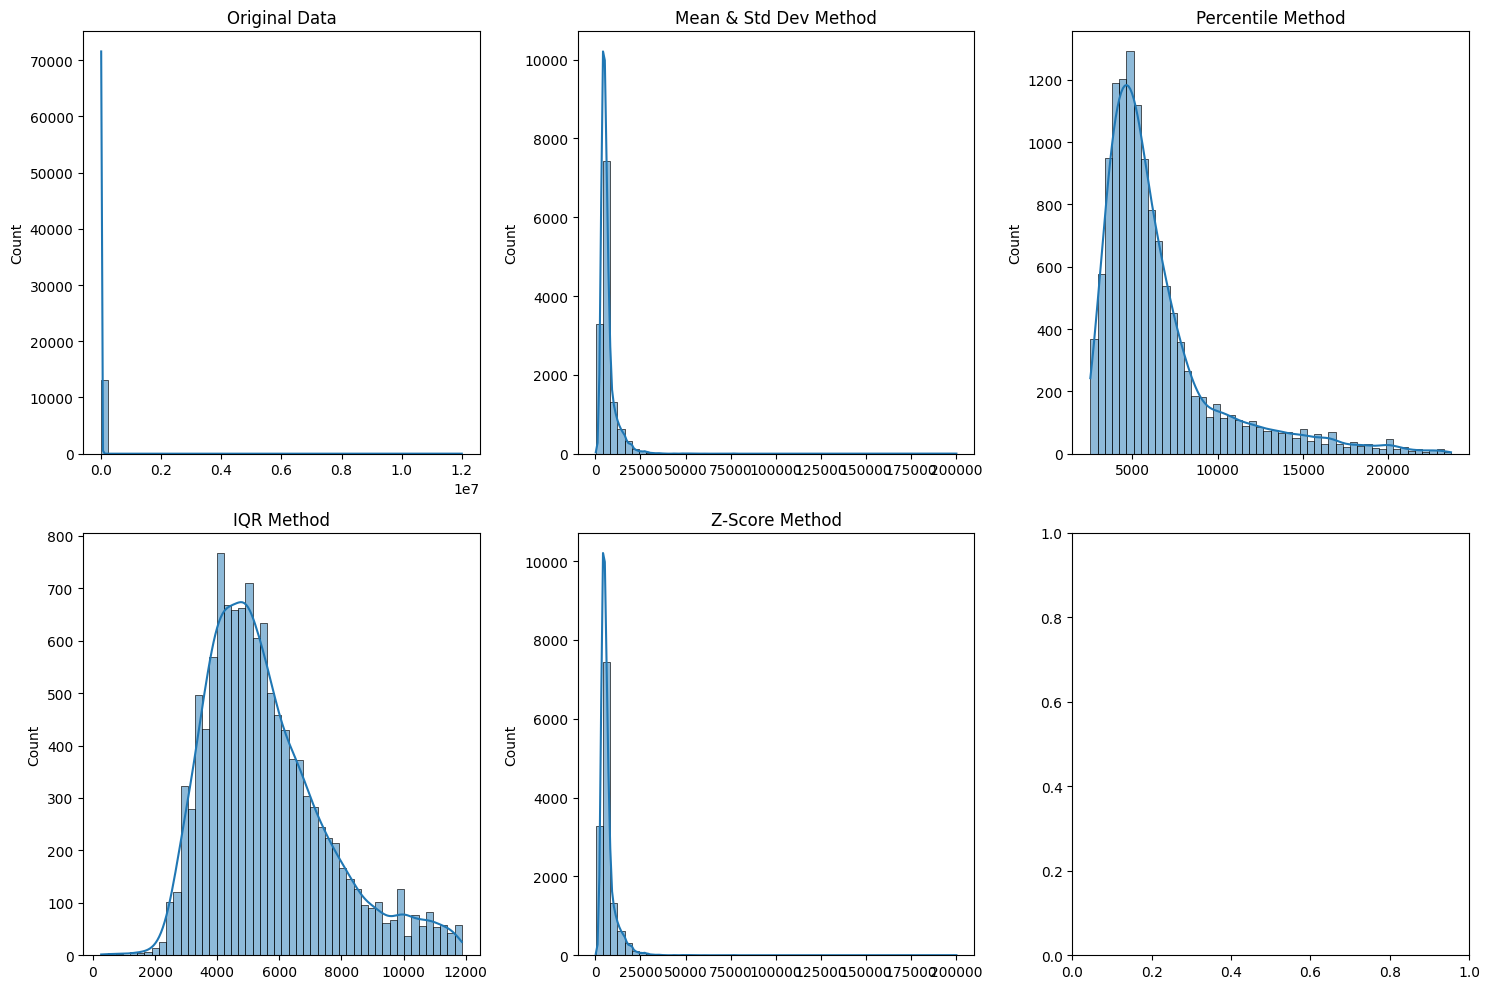

In [36]:
# Q4. Draw Histplot and Check Normality
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(df['price_per_sqft'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Data')
axes[0, 0].set_xlabel('')

sns.histplot(df_no_outliers_std['price_per_sqft'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Mean & Std Dev Method')
axes[0, 1].set_xlabel('')

sns.histplot(df_no_outliers_percentile['price_per_sqft'], bins=50, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Percentile Method')
axes[0, 2].set_xlabel('')

sns.histplot(df_no_outliers_iqr['price_per_sqft'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('IQR Method')
axes[1, 0].set_xlabel('')

sns.histplot(df_no_outliers_z['price_per_sqft'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Z-Score Method')
axes[1, 1].set_xlabel('')

plt.tight_layout()
plt.show()

In [37]:
# Skewness and Kurtosis before and after transformation
print("Skewness and Kurtosis:")
print("Original Data: Skewness =", df['price_per_sqft'].skew(), ", Kurtosis =", df['price_per_sqft'].kurt())
print("Mean & Std Dev Method: Skewness =", df_no_outliers_std['price_per_sqft'].skew(), ", Kurtosis =", df_no_outliers_std['price_per_sqft'].kurt())
print("Percentile Method: Skewness =", df_no_outliers_percentile['price_per_sqft'].skew(), ", Kurtosis =", df_no_outliers_percentile['price_per_sqft'].kurt())
print("IQR Method: Skewness =", df_no_outliers_iqr['price_per_sqft'].skew(), ", Kurtosis =", df_no_outliers_iqr['price_per_sqft'].kurt())
print("Z-Score Method: Skewness =", df_no_outliers_z['price_per_sqft'].skew(), ", Kurtosis =", df_no_outliers_z['price_per_sqft'].kurt())

Skewness and Kurtosis:
Original Data: Skewness = 108.28105529705168 , Kurtosis = 12095.21502832288
Mean & Std Dev Method: Skewness = 10.477808563841766 , Kurtosis = 313.6466575369049
Percentile Method: Skewness = 2.0275862304057926 , Kurtosis = 4.441284523387301
IQR Method: Skewness = 0.9446919636125651 , Kurtosis = 0.6792271586816425
Z-Score Method: Skewness = 10.477808563841766 , Kurtosis = 313.6466575369049


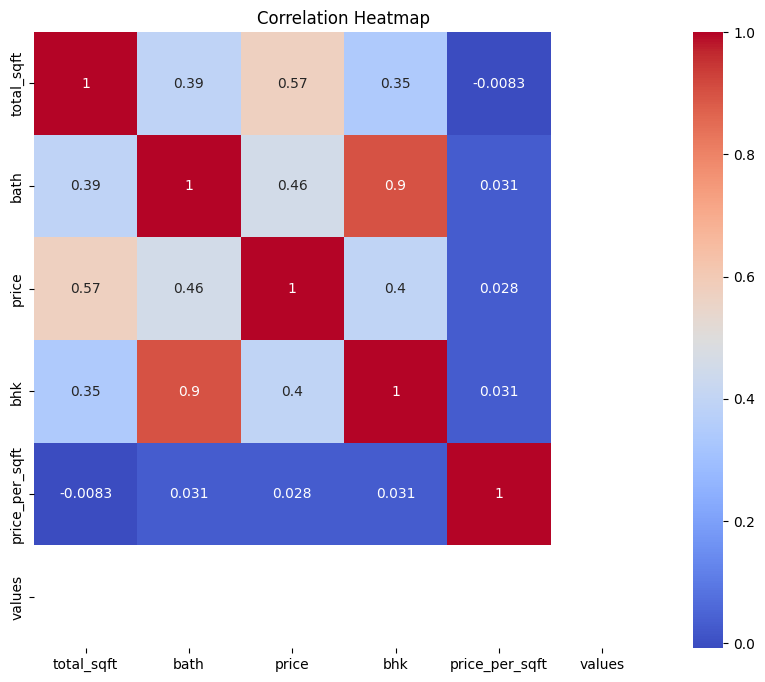

In [45]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

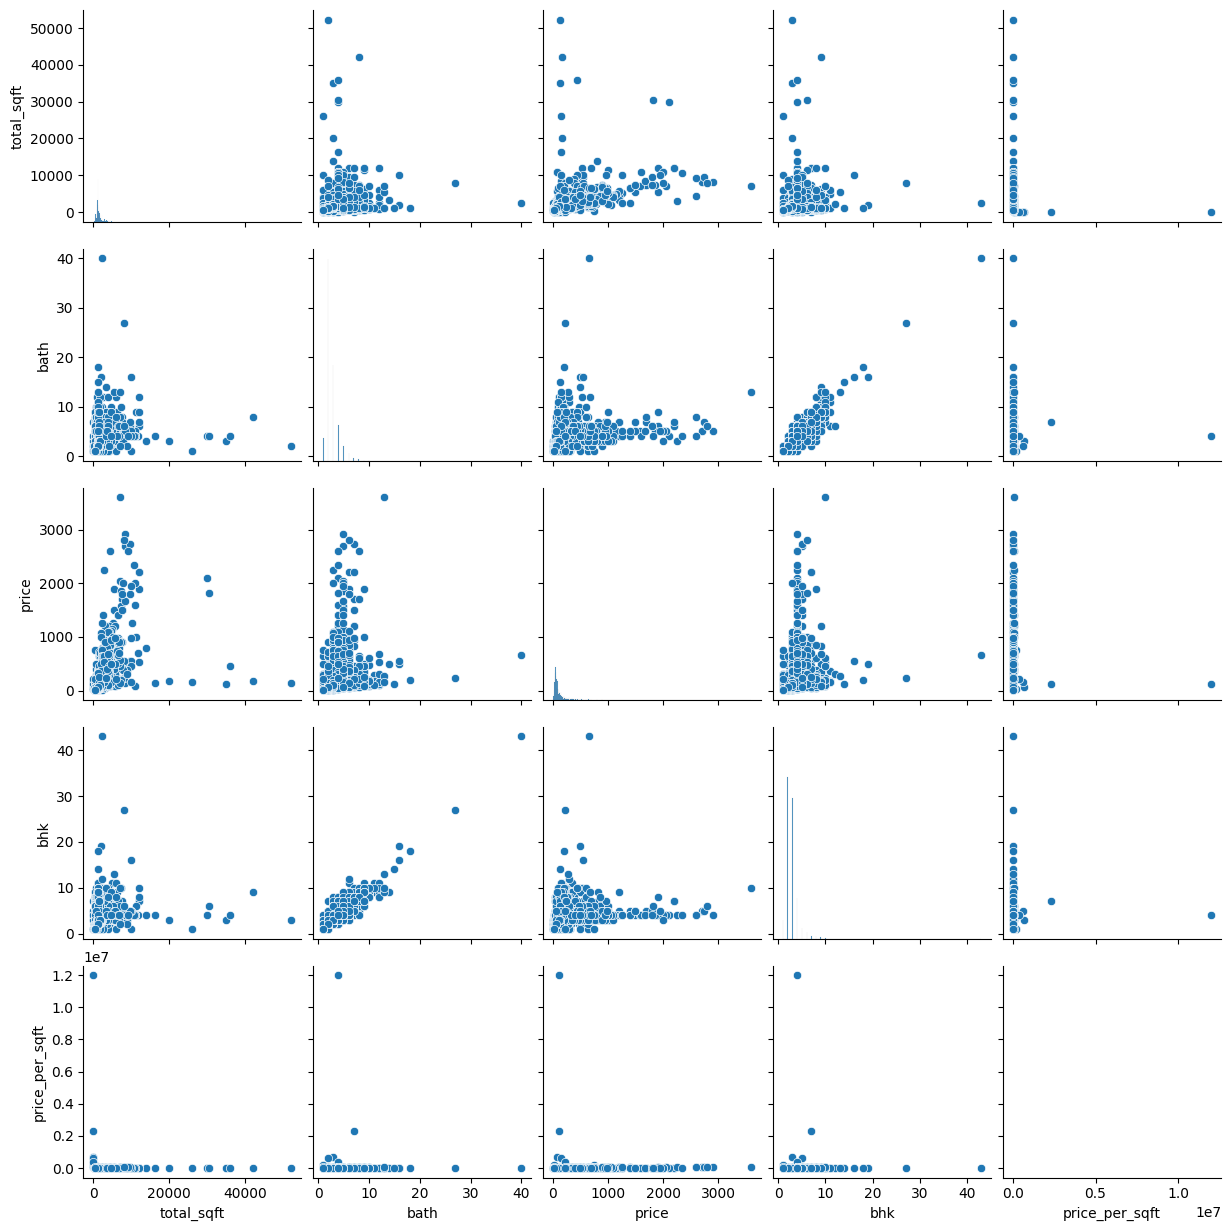

In [40]:
# Q6. Draw Scatter Plot between Variables
sns.pairplot(df)ValueError: could not convert string to float: 'Electronic City Phase II'
plt.show()